# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import gdown
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
dataset_df = pd.read_csv("synthetic_beverage_sales_data.csv")

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
print(dataset_df.head())

  Order_ID Customer_ID Customer_Type             Product     Category  \
0     ORD1     CUS1496           B2B          Vio Wasser        Water   
1     ORD1     CUS1496           B2B               Evian        Water   
2     ORD1     CUS1496           B2B              Sprite  Soft Drinks   
3     ORD1     CUS1496           B2B  Rauch Multivitamin       Juices   
4     ORD1     CUS1496           B2B        Gerolsteiner        Water   

   Unit_Price  Quantity  Discount  Total_Price             Region  Order_Date  
0        1.66        53      0.10        79.18  Baden-Württemberg  2023-08-23  
1        1.56        90      0.10       126.36  Baden-Württemberg  2023-08-23  
2        1.17        73      0.05        81.14  Baden-Württemberg  2023-08-23  
3        3.22        59      0.10       170.98  Baden-Württemberg  2023-08-23  
4        0.87        35      0.10        27.40  Baden-Württemberg  2023-08-23  


In [ ]:
print("Beverage Details")
display(dataset_df.describe())

Beverage Details


,Unit_Price,Quantity,Discount,Total_Price
count,8.999910e+06,8.999910e+06,8.999910e+06,8.999910e+06
mean,5.818037e+00,2.313813e+01,2.972879e-02,1.307437e+02
std,1.470050e+01,2.689321e+01,4.479841e-02,5.096947e+02
min,3.200000e-01,1.000000e+00,0.000000e+00,3.000000e-01
25%,1.050000e+00,6.000000e+00,0.000000e+00,8.400000e+00
50%,1.750000e+00,1.100000e+01,0.000000e+00,2.114000e+01
75%,3.210000e+00,3.000000e+01,5.000000e-02,6.949000e+01
max,1.695300e+02,1.000000e+02,1.500000e-01,1.429530e+04


In [ ]:
print(dataset_df.isnull().sum())
print(dataset_df.duplicated().sum())

Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64
0


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
dataset_sample = dataset_df.sample(n=10000, random_state=42)
numerical_cols = ["Unit_Price", "Quantity", "Discount", "Total_Price"]
print(dataset_df.head())

  Order_ID Customer_ID Customer_Type             Product     Category  \
0     ORD1     CUS1496           B2B          Vio Wasser        Water   
1     ORD1     CUS1496           B2B               Evian        Water   
2     ORD1     CUS1496           B2B              Sprite  Soft Drinks   
3     ORD1     CUS1496           B2B  Rauch Multivitamin       Juices   
4     ORD1     CUS1496           B2B        Gerolsteiner        Water   

   Unit_Price  Quantity  Discount  Total_Price             Region  Order_Date  
0        1.66        53      0.10        79.18  Baden-Württemberg  2023-08-23  
1        1.56        90      0.10       126.36  Baden-Württemberg  2023-08-23  
2        1.17        73      0.05        81.14  Baden-Württemberg  2023-08-23  
3        3.22        59      0.10       170.98  Baden-Württemberg  2023-08-23  
4        0.87        35      0.10        27.40  Baden-Württemberg  2023-08-23  


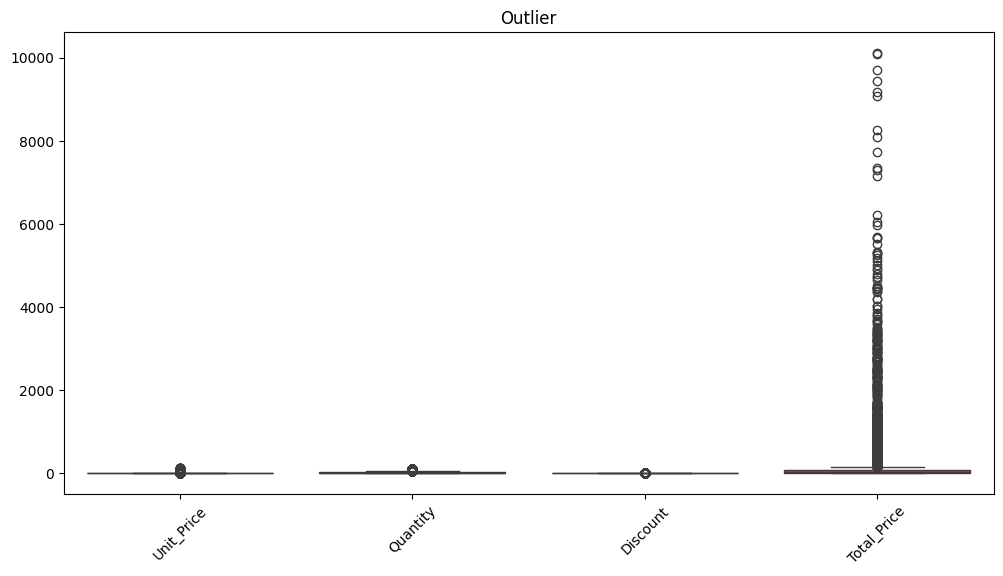

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataset_sample[numerical_cols])
plt.xticks(rotation=45)
plt.title("Outlier")
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dataset_sample[numerical_cols] = scaler.fit_transform(dataset_sample[numerical_cols])

In [ ]:
Q1 = dataset_sample[numerical_cols].quantile(0.25)
Q3 = dataset_sample[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 0.3 * IQR
upper_bound = Q3 + 0.3 * IQR

dataset_sample = dataset_sample[~((dataset_sample[numerical_cols] < lower_bound) |
                                  (dataset_sample[numerical_cols] > upper_bound)).any(axis=1)]

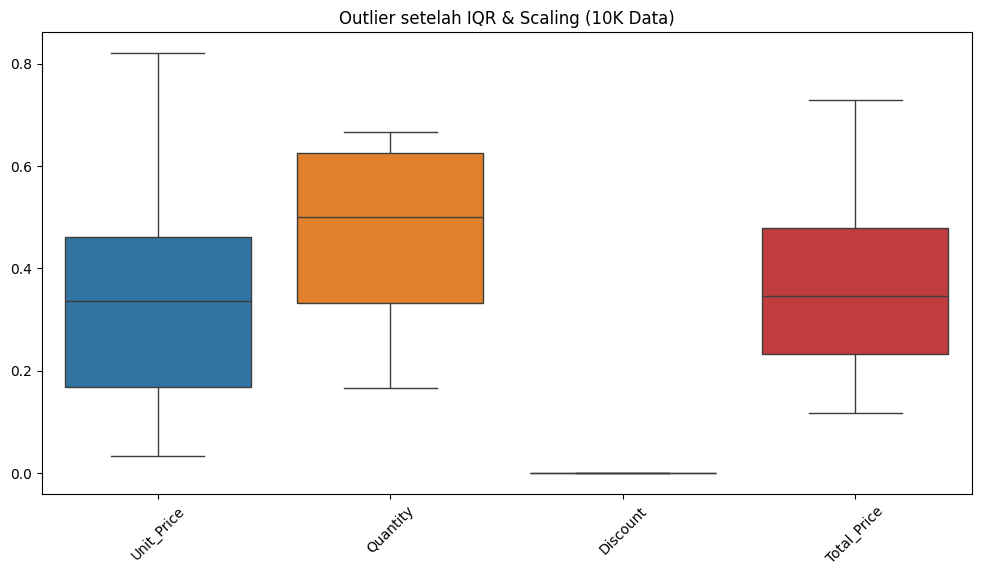

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataset_sample[numerical_cols])
plt.xticks(rotation=45)
plt.title("Outlier setelah IQR & Scaling (10K Data)")
plt.show()

In [ ]:
encoder = LabelEncoder()
categorical_cols = ["Customer_Type", "Category", "Region"]

for col in categorical_cols:
    dataset_sample[col] = encoder.fit_transform(dataset_sample[col])

print(dataset_sample.head())

           Order_ID Customer_ID  Customer_Type        Product  Category  \
8415608  ORD2805233     CUS8793              0  Schwip Schwap         2   
3575851  ORD1191549     CUS4754              0    Apollinaris         3   
8622153  ORD2873933     CUS4969              0          Fanta         2   
2732703   ORD910345     CUS6641              0          Evian         3   
3306800  ORD1101730     CUS2416              0         Beck's         0   

         Unit_Price  Quantity  Discount  Total_Price  Region  Order_Date  
8415608    0.460674  0.333333       0.0     0.370499      10  2023-08-15  
3575851    0.078652  0.500000       0.0     0.202091       2  2021-02-16  
8622153    0.370787  0.666667       0.0     0.581882       9  2022-09-16  
2732703    0.505618  0.166667       0.0     0.250871       9  2023-05-20  
3306800    0.617978  0.500000       0.0     0.648084       0  2023-11-23  


In [ ]:
numerical_features = dataset_sample.select_dtypes(include=['number']).columns
dataset_kmeans = dataset_sample[numerical_features]

print(dataset_kmeans.dtypes)

Customer_Type      int64
Category           int64
Unit_Price       float64
Quantity         float64
Discount         float64
Total_Price      float64
Region             int64
dtype: object


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
dataset_kmeans['Cluster'] = kmeans.fit_predict(dataset_kmeans)
labels = kmeans.fit_predict(dataset_kmeans)

print(dataset_kmeans.head())

         Customer_Type  Category  Unit_Price  Quantity  Discount  Total_Price  \
8415608              0         2    0.460674  0.333333       0.0     0.370499   
3575851              0         3    0.078652  0.500000       0.0     0.202091   
8622153              0         2    0.370787  0.666667       0.0     0.581882   
2732703              0         3    0.505618  0.166667       0.0     0.250871   
3306800              0         0    0.617978  0.500000       0.0     0.648084   

         Region  Cluster  
8415608      10        2  
3575851       2        0  
8622153       9        2  
2732703       9        2  
3306800       0        0  


<ipython-input-46-da1f037d8683>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_kmeans['Cluster'] = kmeans.fit_predict(dataset_kmeans)


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

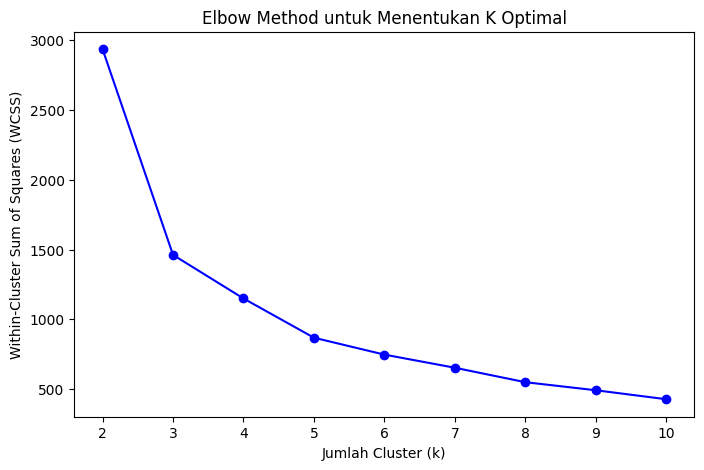

In [ ]:
wcss = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(dataset_kmeans)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='-', color='b')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method untuk Menentukan K Optimal")
plt.show()

In [ ]:
before_feature = silhouette_score(dataset_kmeans, labels)
print(f"Silhouette Score menggunakan K-Means: {before_feature:.4f}")

Silhouette Score menggunakan K-Means: 0.5349


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

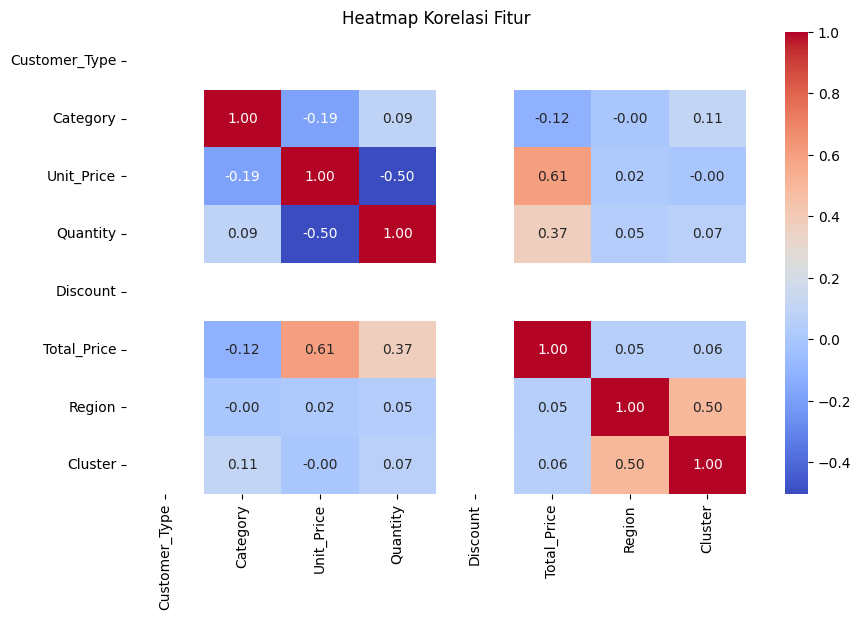

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(dataset_kmeans.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Fitur")
plt.show()

In [ ]:
selected_features = ["Unit_Price", "Discount", "Category"]

dataset_selected = dataset_kmeans[selected_features].copy()

# Clustering ulang
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(dataset_selected)

silhouette_avg = silhouette_score(dataset_selected, labels)
print(f"Silhouette Score sebelum feature selection: {before_feature:.4f}")
print(f"Silhouette Score setelah feature selection: {silhouette_avg:.4f}")

Silhouette Score sebelum feature selection: 0.5349
Silhouette Score setelah feature selection: 0.7795


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

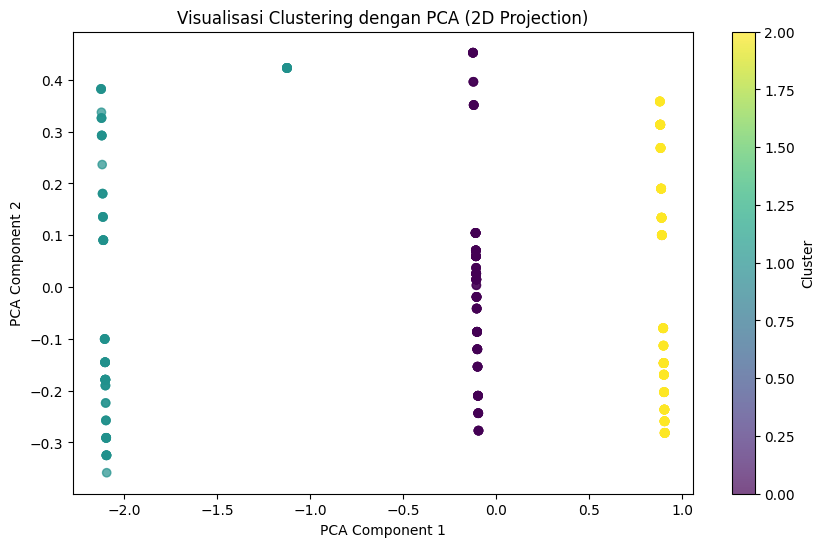

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(dataset_selected)

dataset_selected['PCA1'] = pca_result[:, 0]
dataset_selected['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(dataset_selected['PCA1'], dataset_selected['PCA2'],
                      c=labels, cmap='viridis', alpha=0.7)

plt.colorbar(scatter, label="Cluster")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Visualisasi Clustering dengan PCA (2D Projection)")
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
dataset_selected["Cluster"] = labels
print(dataset_selected.head())

         Unit_Price  Discount  Category      PCA1      PCA2  Cluster
8415608    0.460674       0.0         2 -0.109967  0.104417        0
3575851    0.078652       0.0         3  0.904729 -0.236659        2
8622153    0.370787       0.0         2 -0.106315  0.014604        0
2732703    0.505618       0.0         3  0.887381  0.189955        2
3306800    0.617978       0.0         0 -2.114707  0.180328        1


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
categorical_cols = ["Category"]

for col in categorical_cols:
    dataset_selected[col] = encoder.inverse_transform(dataset_selected[col])

print(dataset_selected.head())

         Unit_Price  Discount           Category      PCA1      PCA2  Cluster
8415608    0.460674       0.0             Berlin -0.109967  0.104417        0
3575851    0.078652       0.0        Brandenburg  0.904729 -0.236659        2
8622153    0.370787       0.0             Berlin -0.106315  0.014604        0
2732703    0.505618       0.0        Brandenburg  0.887381  0.189955        2
3306800    0.617978       0.0  Baden-Württemberg -2.114707  0.180328        1


In [ ]:
scaler.fit(dataset_kmeans[["Unit_Price", "Discount"]])

# Inverse transform data numerik
dataset_selected[["Unit_Price", "Discount"]] = scaler.inverse_transform(
    dataset_selected[["Unit_Price", "Discount"]]
)

print(dataset_selected.head())

         Unit_Price  Discount           Category      PCA1      PCA2  Cluster
8415608    0.396036       0.0             Berlin -0.109967  0.104417        0
3575851    0.095569       0.0        Brandenburg  0.904729 -0.236659        2
8622153    0.325338       0.0             Berlin -0.106315  0.014604        0
2732703    0.431385       0.0        Brandenburg  0.887381  0.189955        2
3306800    0.519758       0.0  Baden-Württemberg -2.114707  0.180328        1


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
numeric_cols = dataset_selected.select_dtypes(include=["number"])

cluster_summary = numeric_cols.groupby("Cluster").mean()

categorical_cols = ["Category"]
cluster_summary_cat = dataset_selected.groupby("Cluster")[categorical_cols].agg(lambda x: x.mode().iloc[0])

final_cluster_summary = cluster_summary.merge(cluster_summary_cat, on="Cluster", how="left")
display(final_cluster_summary)

# Hasil diskon 0, karena angkanya terlalu kecil dan setelah dilakukan scalling minmax, angkanya menjadi 0.00

,Unit_Price,Discount,PCA1,PCA2,Category
Cluster,,,,,
0,0.321417,0.0,-0.106112,0.009622,Berlin
1,0.380350,0.0,-1.982609,0.008306,Baden-Württemberg
2,0.273311,0.0,0.895547,-0.010859,Brandenburg


Tulis hasil interpretasinya di sini.
# Cluster 0
*   Rata-rata unit price: 0.32
* Rata-rata discount = 0.00
* Kategori Produk Dominan: Berlin
* Analisis: Cluster ini terdiri dari pelanggan yang membeli produk dengan harga yang lebih rendah tanpa adanya diskon. Nilai PCA 1 yang lebih rendah dibandingkan dengan cluster lainnya menunjukkan bahwa pelanggan dalam cluster ini memiliki pola pembelian yang lebih cenderung ke kategori Berlin. Hal ini dapat menunjukkan bahwa pelanggan dalam cluster ini lebih memilih produk yang lebih umum atau lebih mudah diakses di pasar.
# Cluster 1
* Rata-rata unit price: 0.38
* Rata-rata discount: 0.00
* Kategori dominan: Baden-Württemberg
* Analisis: Pelanggan dalam cluster ini memiliki pola pembelian dengan harga unit lebih tinggi dibandingkan cluster lainnya. Nilai PCA 1 yang negatif menunjukkan bahwa produk yang dibeli kemungkinan berasal dari kategori yang lebih spesifik, yaitu Baden-Württemberg. Hal ini mengindikasikan bahwa pelanggan dalam cluster ini cenderung memilih produk dengan kualitas lebih tinggi atau nilai yang lebih eksklusif dibandingkan dengan cluster lainnya.
# Cluster 2
* Rata-rata unit price: 0.31
* Rata-rata discount: 0.00
* Kategori dominan: Brandenburg
* Analisis: Cluster ini memiliki pola pembelian yang lebih seimbang dibandingkan dua cluster lainnya. Rata-rata unit price berada di antara cluster 0 dan 1, dengan nilai PCA yang lebih netral. Pelanggan dalam cluster ini lebih dominan membeli produk dalam kategori Brandenburg, yang bisa menunjukkan bahwa pelanggan dalam cluster ini memiliki preferensi terhadap produk dari kategori tersebut, tetapi tidak menunjukkan kecenderungan kuat terhadap harga yang terlalu tinggi atau rendah.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [60]:
dataset_selected.to_csv("dataset_clustering.csv", index=False)

print("Dataset berhasil diekspor sebagai 'dataset_clustering.csv'")

Dataset berhasil diekspor sebagai 'dataset_clustering.csv'
